# step 1 -- >> import libraries


In [12]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler 

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.common.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam, adadelta,Nadam
from tensorflow.keras.callbacks import EarlyStopping


# step 2 -->> set input path and convert the image dimention and color to 28 x 28 and bgr grey after that normalize it by dividing 255 finally it load the image 

In [26]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/natural_images'
data_dir_list = os.listdir(data_path)

img_rows=28
img_cols=28
num_channel=1
num_epoch=22

# Define the number of classes
num_classes = 8



labels_name  = {'airplane':0,'car':1, 'cat':2, 'dog':3,'flower':4, 'fruit':5, 'motorbike':6, 'person':7 }

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(28,28))
		img_data_list.append(input_img_resize)
		labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=30)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)
#sc = StandardScaler
#X_train = sc.fit_transform(X_train)
#X_test  = sc.fit_transform(X_test)

if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		

USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(28, 28)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(28,28))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled




# Defining the model
input_shape=img_data[0].shape
print("***************************")
print(input_shape)
print("***************************")


Loading the images of dataset-airplane

Loading the images of dataset-car

Loading the images of dataset-cat

Loading the images of dataset-dog

Loading the images of dataset-flower

Loading the images of dataset-fruit

Loading the images of dataset-motorbike

Loading the images of dataset-person

(8267, 28, 28)
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 727, 1170, 1088,  902, 1400, 1000,  994,  986], dtype=int64))
(8267, 1, 28, 28)
***************************
(1, 28, 28)
***************************


# step 3 -->> apply machine learning (CNN) here and make the model

In [27]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Convolution2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Dropout(0.2))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["binary_accuracy"])####ADADELTA


# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


# Training
X_train = X_train.reshape(X_train.shape[0], 1 ,28 ,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

hist = model.fit(X_train, y_train, batch_size=500, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 26, 26)        320       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 26, 26)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 13, 26)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 13, 26)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 11, 64)        15040     
_________________________________________________________________
activation_31 (Activation)   (None, 14, 11, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 5, 64)         

# Training with callbacks


In [31]:
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{binary_accuracy:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=100, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)



Train on 6613 samples, validate on 1654 samples
Epoch 1/22
 100/6613 [..............................] - ETA: 8s - loss: 0.6839 - binary_accuracy: 0.9450

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


6613/6613 [==============================] - 8s 1ms/step - loss: 0.8016 - binary_accuracy: 0.9321 - val_loss: 0.6241 - val_binary_accuracy: 0.9466

Epoch 00001: val_loss improved from inf to 0.62413, saving model to Best-weights-my_model-001-0.8016-0.9321.hdf5
Epoch 2/22
6613/6613 [==============================] - 9s 1ms/step - loss: 0.7694 - binary_accuracy: 0.9347 - val_loss: 0.5999 - val_binary_accuracy: 0.9474

Epoch 00002: val_loss improved from 0.62413 to 0.59994, saving model to Best-weights-my_model-002-0.7694-0.9347.hdf5
Epoch 3/22
6613/6613 [==============================] - 9s 1ms/step - loss: 0.7297 - binary_accuracy: 0.9373 - val_loss: 0.5379 - val_binary_accuracy: 0.9530

Epoch 00003: val_loss improved from 0.59994 to 0.53794, saving model to Best-weights-my_model-003-0.7297-0.9373.hdf5
Epoch 4/22
6613/6613 [==============================] - 9s 1ms/step - loss: 0.6948 - binary_accuracy: 0.9405 - val_loss: 0.5631 - val_binary_accuracy: 0.9502

Epoch 00004: val_loss did no

# step 4 -->> visualizing losses and accuracy

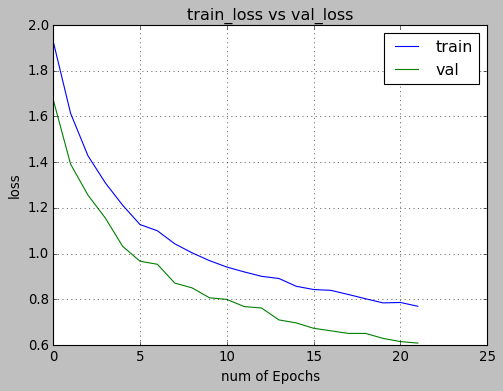

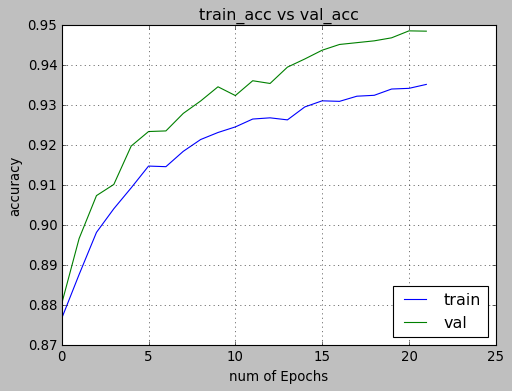

In [28]:

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['binary_accuracy']
val_acc=hist.history['val_binary_accuracy']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)#####################
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


# step 5 -->> Evaluating the model means test the given image  and see the prediction 

In [29]:

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#test_image = X_test[0:1]
#print (test_image.shape)

#print(model.predict(test_image))
#print(model.predict_classes(test_image))
#print(y_test[0:1])

# Testing a new image
test_image = cv2.imread('natural_images/person/person_0771.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print ("test shape :",test_image.shape)
   
if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		



lst =[0 ,1 ,2 ,3 ,4 ,5 ,6 , 7]

labels_name  = {'airplane':0,'car':1, 'cat':2, 'dog':3,'flower':4, 'fruit':5, 'motorbike':6, 'person':7 }
name_list = list(labels_name.keys()) 
val_list = list(labels_name.values())

for pict in lst:
    if(model.predict_classes(test_image) == pict):
        print(model.predict_classes(test_image),"==========>",name_list[val_list.index(pict)]) 

     


Test Loss: 0.6083619889353898
Test accuracy: 0.9484582543373108
test shape : (28, 28)
(1, 1, 28, 28)
[7] ==========> person


# step 6 -->> Printing the confusion matrix

[[5.38e-03 1.04e-01 2.57e-01 ... 2.70e-04 1.14e-02 2.39e-03]
 [2.69e-03 1.10e-02 6.30e-02 ... 1.37e-06 1.37e-02 4.65e-02]
 [6.08e-04 1.43e-03 5.11e-03 ... 3.48e-06 2.27e-04 9.81e-01]
 ...
 [9.97e-01 1.39e-03 3.33e-04 ... 4.56e-08 3.07e-04 4.62e-04]
 [6.17e-02 8.66e-01 9.85e-03 ... 2.85e-05 1.10e-03 8.41e-04]
 [3.57e-03 7.04e-01 1.14e-01 ... 3.74e-05 4.40e-03 4.44e-05]]
[3 4 7 ... 0 1 1]
[3 4 7 ... 0 1 1]
                    precision    recall  f1-score   support

 class 0(airplane)       0.86      0.93      0.89       144
      class 1(car)       0.79      0.90      0.84       228
      class 2(cat)       0.65      0.61      0.63       214
      class 3(dog)       0.54      0.45      0.49       183
   class 4(flower)       0.74      0.72      0.73       293
    class 5(fruit)       0.96      0.99      0.98       195
class 6(motorbike)       0.91      0.90      0.91       202
   class 7(person)       0.94      0.96      0.95       195

          accuracy                           0.80 

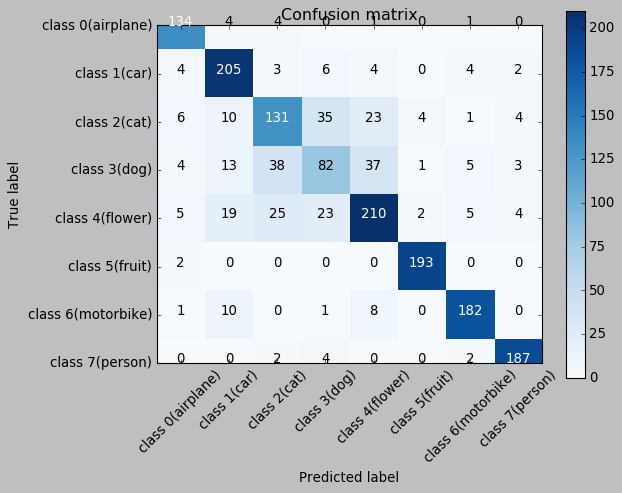

In [30]:

from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
y_pred = model.predict_classes(X_test)
print(y_pred)
#target_names = ['class 0(bikes)','class 1(cars)', 'class 2(cats)', 'class 3(dogs)','class 4(flower)', 'class 5(horses)', 'class 6(humans)']        
target_names = ['class 0(airplane)','class 1(car)', 'class 2(cat)', 'class 3(dog)','class 4(flower)', 'class 5(fruit)', 'class 6(motorbike)', 'class 7(person)'] 					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.figure(1,figsize=(7,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

plt.show()


# Saving and loading model and weights

In [91]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')


Saved model to disk
Loaded model from disk
